## Imports

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

## Data set set-up

In [2]:
data = np.loadtxt('../data/original_data.csv', delimiter=' ')

In [6]:
np.random.shuffle(data)

In [7]:
len(data)

236698

In [44]:
data_sub = data[:]

In [45]:
X = np.asmatrix(data_sub[:,:-1])
y = data_sub[:,-1:].flatten()
print(X.shape)
print(y.shape)

(236698, 14)
(236698,)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## ROC plotting support

In [47]:
from sklearn.metrics import roc_curve

def draw_roc(clf, X_train, X_test, Y_train, Y_test, color, label):
    # train classifier
    clf.fit(X_train,Y_train)
    Y_labels = clf.predict(X_test)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,Y_labels)
    plt.plot(fpr,tpr, color=color, label=label)

def draw_rocs(clf, clf_name, X_train, X_smote_train, X_test, Y_train, Y_smote_train, Y_test):
    fig = plt.figure()
    
    # create plot
    draw_roc(clf, X_train, X_test, Y_train, Y_test, 'darkorange', 'UNSMOTEd')
    draw_roc(clf, X_smote_train, X_test, Y_smote_train, Y_test, 'navy', 'SMOTEd')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title(clf_name)

    plt.show()
    fig.savefig('ROC_%s.png' % clf_name)

## Compare SMOTEd and unSMOTEd ROCs

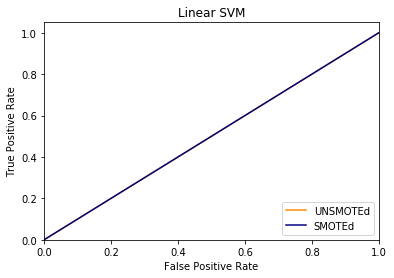

In [48]:
sm = SMOTE(random_state=0)
X_smote_train, y_smote_train = sm.fit_sample(X_train,y_train)
draw_rocs(LinearSVC(), 'Linear SVM', X_train, X_smote_train, X_test, y_train, y_smote_train, y_test)

## Plot in 2D

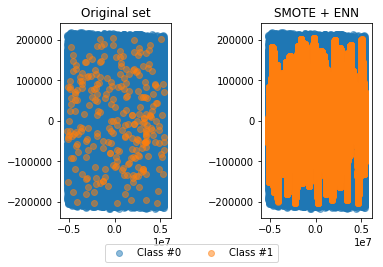

In [53]:
from sklearn.decomposition import PCA

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train)

# Apply SMOTE + ENN
sm = SMOTEENN()
X_res_vis = pca.transform(X_smote_train)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y_train == 0, 0], X_vis[y_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y_train == 1, 0], X_vis[y_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_smote_train == 0, 0], X_res_vis[y_smote_train == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_smote_train == 1, 0], X_res_vis[y_smote_train == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + ENN')

f.legend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

## Predict using SMOTE and Linear SVM

In [49]:
from sklearn.metrics import confusion_matrix
clf = make_pipeline(SMOTE(random_state=0), LinearSVC())
# clf = LinearSVC(class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10372, 36899],
       [    6,    63]])